In [7]:
%matplotlib widget
import warnings
import inspect
import IPython.display
from cued_sf2_lab.familiarisation import load_mat_img, plot_image
from my_LP import quantise
from my_DWT import *
from cued_sf2_lab.jpeg import dwtgroup
from huffman import DWT_huffenc, DWT_huffdec
from common import *

In [8]:
lighthouse, _ = load_mat_img(img='lighthouse.mat', img_info='X')
bridge, _ = load_mat_img(img='bridge.mat', img_info='X')
flamingo, _ = load_mat_img(img='flamingo.mat', img_info='X')
lighthouse = lighthouse -  128.0
bridge = bridge - 128.0
flamingo = flamingo - 128.0

In [9]:
qrise = 1
strength = 2

In [10]:
Yq, factors, step = DWT_quant(lighthouse, N, h1, h2, g1, g2, qrise = qrise, strength=strength)

bits: 43452, step: 15.896674438754099
bits: 39897, step: 25.103325561245896
bits: 38241, step: 30.7933488775082
bits: 37205, step: 35.95147297770372
bits: 38271, step: 30.654629734308752
bits: 38901, step: 28.53422022208787
bits: 38471, step: 29.902535738724012
bits: 38599, step: 29.37988571870288
bits: 38482, step: 29.854699630257755
bits: 38515, step: 29.728591680034924
bits: 38555, step: 29.59539785488579
bits: 38502, step: 29.781609939328426
bits: 38502, step: 29.788413646472584
bits: 38502, step: 29.785011792900505
bits: 38502, step: 29.783712400460722
bits: 38502, step: 29.78290933176821
bits: 38502, step: 29.78241300802094
bits: 38502, step: 29.7821062630757
bits: 38502, step: 29.781916684273664
bits: 38502, step: 29.78179951813046
bits: 38502, step: 29.781727105471628
bits: 38502, step: 29.781682351987257
bits: 38502, step: 29.7816546928128
bits: 38502, step: 29.781637598502886
bits: 38502, step: 29.781627033638344
bits: 38502, step: 29.78162050419297
bits: 38502, step: 29.7816

### In huffenc, dcbits must be less that 32!

Generating huffcode and ehuf using custom tables
Coding rows (second pass)
Bits for coded image = 38502
Bits for huffman table = 1424
38502
Generating huffcode and ehuf using custom tables
Decoding rows
Error: 10.48


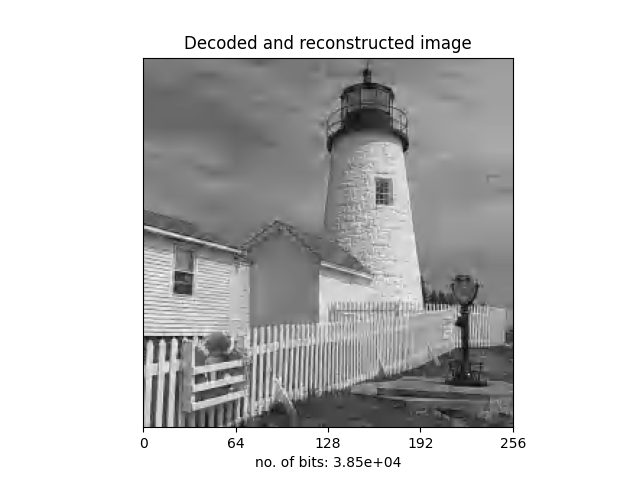

In [12]:
# reconstructed0 = inverse_DWT(Yq, N, g1, g2)
vlc, header = DWT_huffenc(Yq, N, dcbits=12, opthuff=True)
print(np.sum(vlc[:, 1]))
Z = DWT_huffdec(vlc, step, factors, qrise, strength, N, hufftab=header, dcbits=12)
reconstructed = inverse_DWT(Z, N, g1, g2)


fig, axs = plt.subplots()
plot_image(reconstructed, ax=axs)
size_of_img = np.sum(vlc[:, 1])
axs.set(title='Decoded and reconstructed image', yticks=[], xlabel=f'no. of bits: {size_of_img:.2e}')


print("Error:", np.std(reconstructed-lighthouse).round(2))

In [8]:
print(Z[:10, :10])
print(Yq[:10, :10])

[[  -5.36714708  -10.18430008   -4.56428825    3.76142942   -6.17000592
   -37.48150042  -19.01574725  -10.98715892  -15.80431192    0.        ]
 [ -29.45291209  -19.01574725  -28.65005325  -20.62146492  -13.39573542
     6.97286475   -7.77572358  -15.00145308    4.56428825  -27.04433559]
 [ -34.27006509  -36.67864159  -27.84719442  -30.25577092  -10.98715892
   -10.18430008    0.            4.56428825   15.00145308  -88.86446576]
 [ -26.24147675  -32.66434742  -34.27006509  -34.27006509  -40.69293575
   -22.22718259   -7.77572358    8.57858242  -12.59287658 -127.40168976]
 [   9.38144125    6.97286475    0.            0.          -25.43861792
   -20.62146492  -11.79001775    7.77572358  -51.13010059    6.97286475]
 [  -8.57858242   -3.76142942    0.          -10.18430008  -10.18430008
    -4.56428825   -3.76142942   -4.56428825   -6.17000592   15.80431192]
 [  14.19859425    6.17000592   -5.36714708    0.            0.
     3.76142942   13.39573542   22.22718259  -11.79001775   27.044

In [10]:
vlc, header = DWT_huffenc(flamingo, N=7, dcbits=8, opthuff=True)
Z = DWT_huffdec(vlc, 10, factors, qrise, strength, N=7, hufftab=header)

Generating huffcode and ehuf using custom tables
Coding rows (second pass)
Bits for coded image = 528880
Bits for huffman table = 1424
Generating huffcode and ehuf using custom tables
Decoding rows


In [11]:
Zb = DWT_analysis(flamingo, 7, h1, h2, g1, g2, plot = True, qrise=1.5, strength=0)
# Zb = DWT_analysis(bridge, 7, h1, h2, g1, g2, plot = True, qrise=0.2, strength=0.5)
# Zb = DWT_analysis(bridge, 7, h1, h2, g1, g2, step = 12, plot = True, qrise=0.2, strength=0.5)

bits: 150347, step: 15.896674438754099
bits: 142424, step: 25.103325561245896
bits: 139814, step: 30.7933488775082
bits: 138275, step: 36.44980316493606
bits: 138740, step: 34.28922988294868


KeyboardInterrupt: 

In [3]:
from cued_sf2_lab.jpeg import (
    jpegenc, jpegdec, quant1, quant2, huffenc, huffdflt, huffdes, huffgen, runampl, diagscan)


In [4]:
Yq = quantise(flamingo, 17)
print(Yq[:5, :5])


Y = DWT(flamingo, N, h1, h2)
ratios = get_ratios(Y, N, g1, g2)
factors = get_factors(Y, N)

Yq1, factors = quantdwt(Y, np.ones((3, N+1))*ratios, factors, qrise, strength)
Yq2 = quantdwt2(Yq1, 1, factors, qrise, strength)
print(Yq2[:5, :5])

[[-119. -119. -119. -136. -136.]
 [-119. -119. -119. -136. -136.]
 [-119. -136. -119. -119. -119.]
 [-119. -119. -119. -119. -119.]
 [-119. -119. -119. -119. -119.]]
[[1.         0.65212702 0.35563319 0.18207392 0.19430699]
 [1.         0.65212702 0.35563319 0.18207392 0.00207666]
 [0.72231512 0.56316094 0.32735463 0.17061102 0.00207666]] 1.2 [[ 8.45136127  5.14122764  3.45883947  2.31023314  1.        ]
 [11.322507    7.15252947  4.79681336  3.62920882 73.29351872]
 [23.0950852  13.96209687  8.44120467  5.61544405 73.29351872]]
[[1.         0.65212702 0.35563319 0.18207392 0.19430699]
 [1.         0.65212702 0.35563319 0.18207392 0.00207666]
 [0.72231512 0.56316094 0.32735463 0.17061102 0.00207666]] 1.2 [[ 8.45136127  5.14122764  3.45883947  2.31023314  1.        ]
 [11.322507    7.15252947  4.79681336  3.62920882 73.29351872]
 [23.0950852  13.96209687  8.44120467  5.61544405 73.29351872]]
[[-129.75669761 -118.29258514 -122.37303195 -125.6762508  -126.45347876]
 [-111.10322648 -128.00